# Example of performing linear least squares fitting

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Now let's generate some random data about a trend line

In [12]:
#set a random number seed
np.random.seed(119)

#set number of data points
npoints = 50

#set x
x = np.linspace(0,10.,npoints)

#set slope, intercept, and scatter rms
m = 2.0
b = 1.0
sigma = 2.0

#generate y points
y = m*x + b + np.random.normal(scale=sigma,size=npoints)
y_err = np.full(npoints,sigma)
#npfull makes an array that is full to npoints with sigma at every value

### Let's just plot the data first

Text(0, 0.5, 'y')

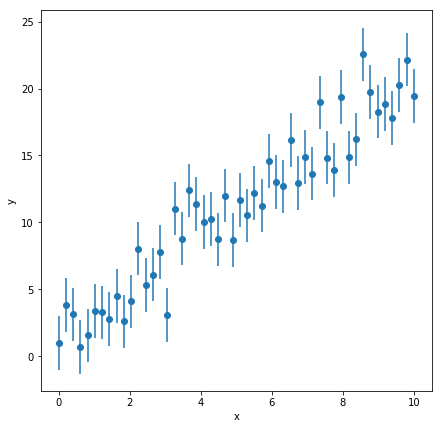

In [13]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,sigma,fmt='o')
plt.xlabel('x')
plt.ylabel('y')

### Method #1, polyfit()

In [14]:
m_fit, b_fit = np.poly1d(np.polyfit(x,y,1,w=1./y_err)) #weight with uncertainties
#m_fit, b_fiot means that we are taking the first two values given by np.poly1 and assigning them to m and b fit
#polyfit provides polynomial fit to y as a function of x to the order of 1
#only provide one power for "inverse variance weighting"?
print(m_fit, b_fit)

y_fit = m_fit * x + b_fit

1.9634043470399505 1.283010681296193


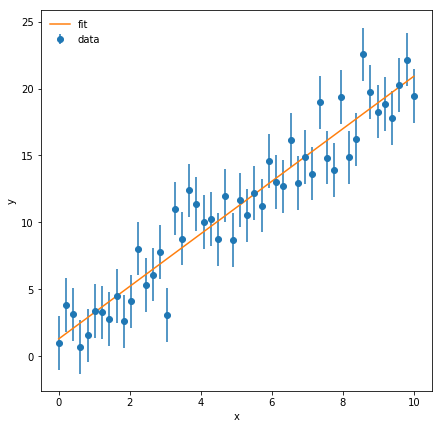

In [15]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,yerr=y_err, fmt='o',label='data')
plt.plot(x,y_fit,label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2,frameon=False)

### Method #2, scipy + optimize

In [17]:
#scipy method is more flexible, 
#but the polyfit gives an analytical (formal) answer

In [18]:
#import optimize from scipy
from scipy import optimize

#define the function to fit
def f_line(x,m,b):
    return m*x + b

#perform the fit
params, params_cov = optimize.curve_fit(f_line,x,y,sigma=y_err)

m_fit = params[0]
b_fit = params[1]
print(m_fit,b_fit)

1.9634043457508432 1.2830106890542259


### We can perform much more complicated fits

Text(0, 0.5, 'y')

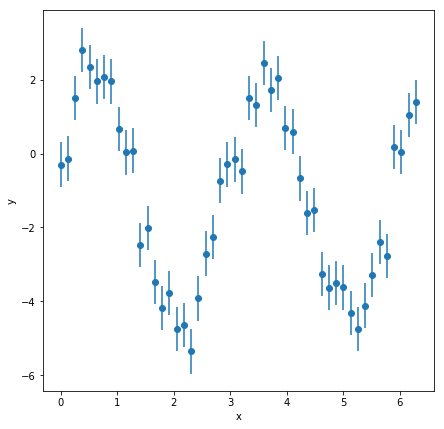

In [28]:
#redefine x and y
npoints = 50
x = np.linspace(0,2*np.pi,npoints)

#make y a complicated function
a = 3.4
b = 2.1
c = 0.27
d = -1.3
sig = 0.6

y = a * np.sin(b*x + c) + d + np.random.normal(scale=sig, size=npoints)
y_err = np.full(npoints,sig)

f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,yerr=y_err,fmt='o')
plt.xlabel('x')
plt.ylabel('y')


#He redefined y_err I think, but not sure

In [29]:
#import optimize from scipy
from scipy import optimize

#define the function to fit
def f_line(x, a, b, c, d):
    return a * np.sin( b*x + c) + d

#perform the fit
params, params_cov = optimize.curve_fit(f_line,x,y,sigma=y_err,p0=[1,2.,0.1,-0.1])

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]

print(a_fit,b_fit,c_fit,d_fit)

y_fit = a_fit * np.sin(b_fit * x + c_fit) + d_fit

3.3147066737316777 2.10036419338913 0.2785287748081569 -1.2152216609473796


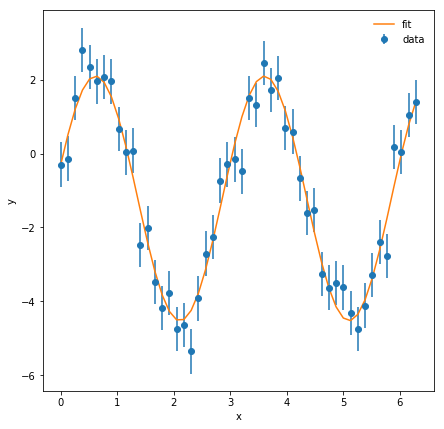

In [30]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,yerr=y_err,fmt='o',label='data')
plt.plot(x,y_fit,label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=0,frameon=False)